<a href="https://colab.research.google.com/github/OFCMatt/EBAC/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar a base de dados
df = pd.read_csv('demo01_processed.csv')

# Verificar se há valores faltantes
print(df.isnull().sum())

# Separar a variável resposta ('mau') das variáveis explicativas
X = df.drop(columns=['mau'])  # Variáveis explicativas
y = df['mau']  # Variável resposta

# Verificar se há variáveis de tipo string (se houver, elas devem ser convertidas)
print(X.dtypes)

# Garantir que a base está somente com variáveis numéricas e sem strings
X = X.select_dtypes(include=['number'])

# Separar os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamanho do treino: {X_train.shape}")
print(f"Tamanho do teste: {X_test.shape}")


qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

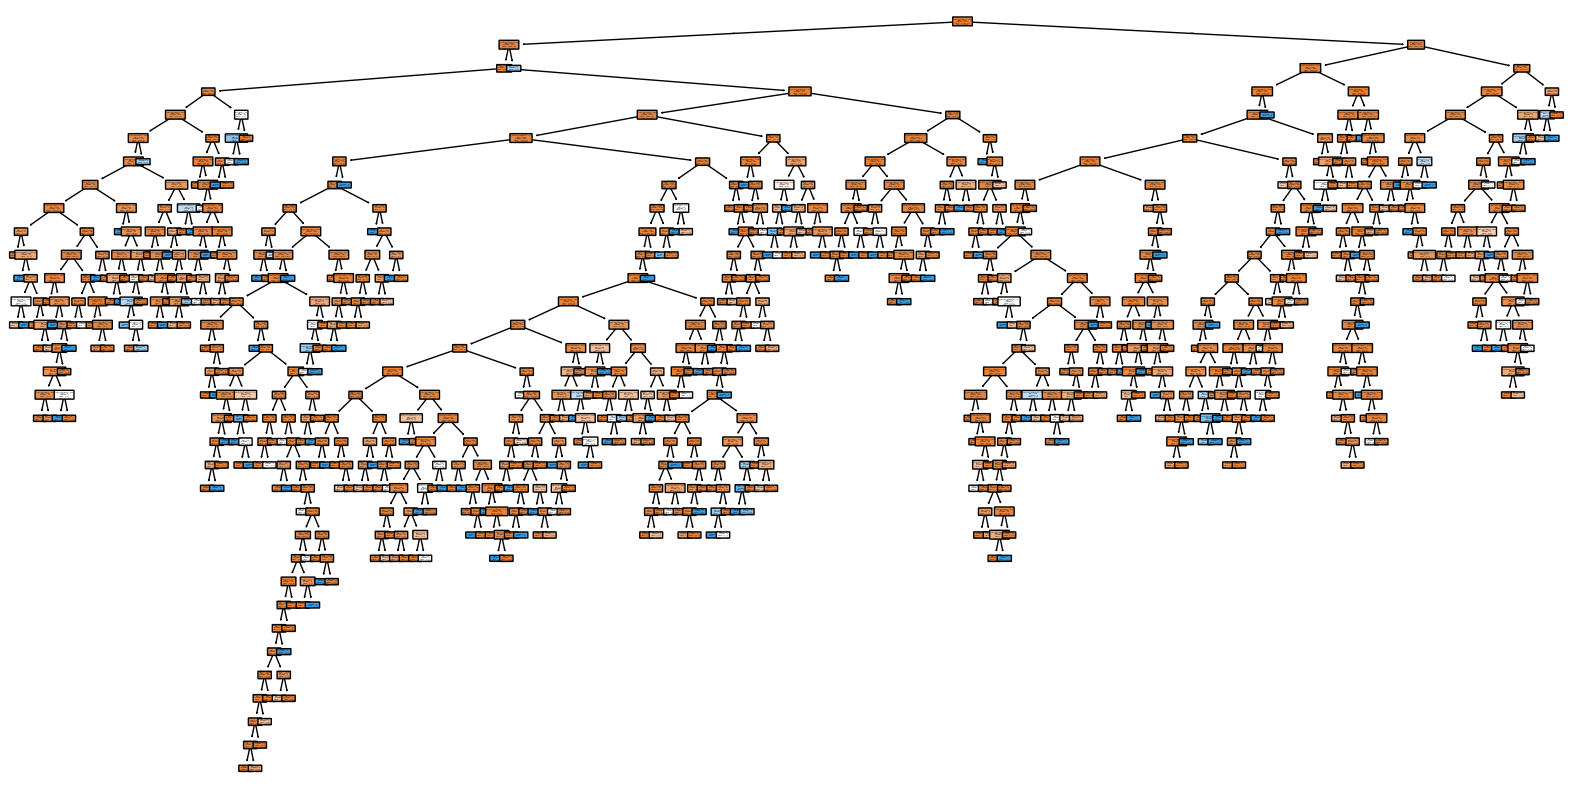

Acurácia na base de treinamento: 0.9901
Matriz de Confusão - Treinamento:
[[11370    12]
 [  103   170]]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Definir e treinar a árvore de decisão
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

# Visualizar a árvore
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Aprovado", "Reprovado"], rounded=True)
plt.show()

# Acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f"Acurácia na base de treinamento: {train_accuracy:.4f}")

# Matriz de Confusão para o treinamento
conf_matrix_train = confusion_matrix(y_train, clf.predict(X_train))
print(f"Matriz de Confusão - Treinamento:\n{conf_matrix_train}")


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Acurácia na base de teste: 0.9692
Matriz de Confusão - Teste:
[[4811   67]
 [  87   30]]


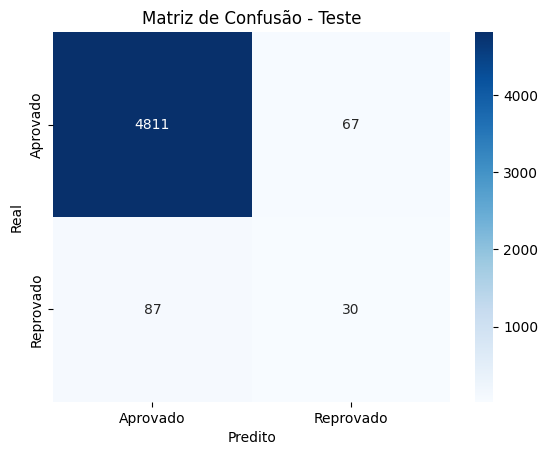

In [9]:
# Acurácia na base de teste
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

# Matriz de Confusão para o teste
conf_matrix_test = confusion_matrix(y_test, clf.predict(X_test))
print(f"Matriz de Confusão - Teste:\n{conf_matrix_test}")

# Visualizar a matriz de confusão
import seaborn as sns
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprovado", "Reprovado"], yticklabels=["Aprovado", "Reprovado"])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Teste')
plt.show()


In [10]:
# Treinar o modelo ajustado com número mínimo de observações por folha de 5 e profundidade máxima de 10
clf_adjusted = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_adjusted.fit(X_train, y_train)

# Gerar a matriz de confusão para o modelo ajustado
conf_matrix_test_adjusted = confusion_matrix(y_test, clf_adjusted.predict(X_test))

# Proporção de proponentes classificados como 'maus'
prop_maus = conf_matrix_test_adjusted[1, 1] / (conf_matrix_test_adjusted[1, 0] + conf_matrix_test_adjusted[1, 1])
print(f"Proporção de proponentes classificados como 'maus': {prop_maus:.4f}")


Proporção de proponentes classificados como 'maus': 0.0598


In [11]:
# Se todos os contratos fossem classificados como 'bons' (classe 0)
y_pred_all_bons = [0] * len(y_test)

# Acurácia dessa estratégia
accuracy_all_bons = accuracy_score(y_test, y_pred_all_bons)
print(f"Acurácia se todos fossem classificados como 'bons': {accuracy_all_bons:.4f}")


Acurácia se todos fossem classificados como 'bons': 0.9766
